In [36]:
import pandas as pd
import numpy as np
import pickle
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import kneighbors_graph
# from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


le=LabelEncoder()
li=LinearRegression()
lr=LogisticRegression()
rfc=RandomForestClassifier(n_estimators= 20, criterion="entropy")
svc=SVC(kernel='linear')
dtc=DecisionTreeClassifier()

neew_path="C:\Users\ADMIN\OneDrive\machine learning\projects\image classification"

face_cascade =cv2.CascadeClassifier(new_path+"\haarcascade_frontalface_default.xml")
# eye_cascade = cv2.CascadeClassifier(r"C:\Users\ADMIN\OneDrive\machine learning\projects\image classification\haarcascade_eye.xml")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2432629170.py, line 24)

In [15]:
img=cv2.imread("./images/hrithik roshan - Google Search/10hrithik-roshan15.jpg")
img.shape

(829, 670, 3)

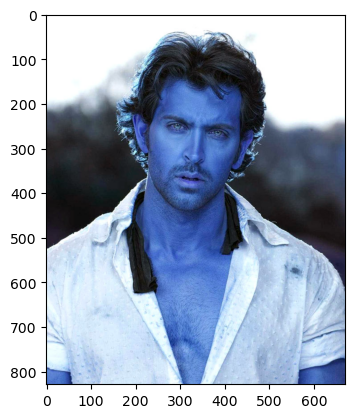

In [16]:
plt.imshow(img)

(829, 670)

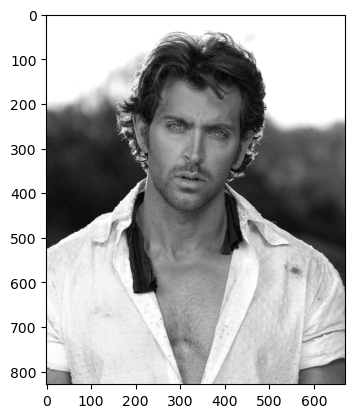

In [17]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

In [18]:
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# eyes = eye_cascade.detectMultiScale(roi_gray)
# img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
# img=cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [22]:
def get_cropped_image_if_2_eyes(path):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            return roi_color

In [23]:
img=get_cropped_image_if_2_eyes("./images/hrithik roshan - Google Search/10hrithik-roshan15.jpg")
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [11]:
path_to_cr_data="./cropped/"

In [12]:
import os
img_dirs = []
for entry in os.scandir("./images/"):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [13]:
img_dirs

['./images/hrithik roshan - Google Search',
 './images/messi - Google Search',
 './images/tom holland - Google Search',
 './images/virat k - Google Search']

In [14]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

hrithik roshan - Google Search
messi - Google Search
tom holland - Google Search
virat k - Google Search
Generating cropped images in folder:  ./cropped/virat k - Google Search


In [18]:
import pywt
import cv2    
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

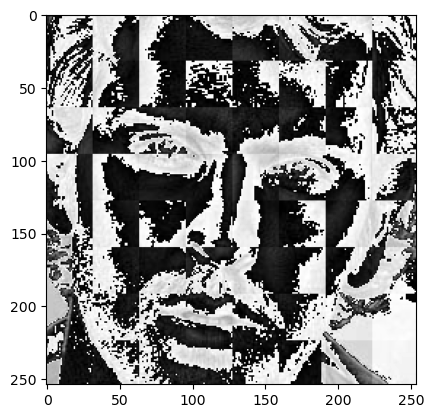

In [19]:
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'hrithik roshan - Google Search': 0,
 'messi - Google Search': 1,
 'tom holland - Google Search': 2,
 'virat k - Google Search': 3}

In [21]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])  
            

In [22]:
X = np.array(x).reshape(len(x),4096).astype(float)
X.shape

(222, 4096)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 100))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7857142857142857

In [25]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.89      0.62      0.73        13
           2       0.84      0.80      0.82        20
           3       0.91      0.83      0.87        12

    accuracy                           0.79        56
   macro avg       0.81      0.79      0.78        56
weighted avg       0.82      0.79      0.79        56



In [26]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7857142857142857

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [51]:
!pip install joblib
import joblib 
joblib.dump(svc, 'saved_model.pkl') 

['saved_model.pkl']